In [ ]:
!pip install torch torchvision torchaudio transformers scikit-learn pandas numpy

In [ ]:
# Install dependencies (if running on Colab)


import pandas as pd
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, get_scheduler
from torch.optim import AdamW
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

In [ ]:
# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
df = pd.read_csv("Landcover > Discharger.csv")  # Update path if needed

# Map text labels to numeric
label_mapping = {"Low": 0, "Medium": 1, "High" : 2}
df["Label"] = df["Label"].map(label_mapping)
texts = df["TextDescription"].tolist()
labels = df["Label"].tolist()

# Tokenize all at once
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
encodings = tokenizer(
    texts,
    padding="max_length",
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

In [ ]:

# Custom Dataset class
class PFASDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [ ]:

# Create dataset object
dataset = PFASDataset(encodings, labels)

# K-Fold setup
k_folds = 5
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Metrics trackers
all_accuracies, all_precisions, all_recalls, all_f1s = [], [], [], []
fold_names = []
train_losses, test_losses = [], []
train_kappas, test_kappas = [], []
all_confidences, wrong_confidences = [], []


===== Fold 1 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.3286
Epoch 2 | Avg Loss: 0.0026
Epoch 3 | Avg Loss: 0.0016
Epoch 4 | Avg Loss: 0.0011
Epoch 5 | Avg Loss: 0.0009
Epoch 6 | Avg Loss: 0.0008
Epoch 7 | Avg Loss: 0.0007
Epoch 8 | Avg Loss: 0.0006
Epoch 9 | Avg Loss: 0.0006
Epoch 10 | Avg Loss: 0.0006
Fold 1 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        56
           1      1.000     1.000     1.000        17
           2      1.000     1.000     1.000        13

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[56  0  0]
 [ 0 17  0]
 [ 0  0 13]]


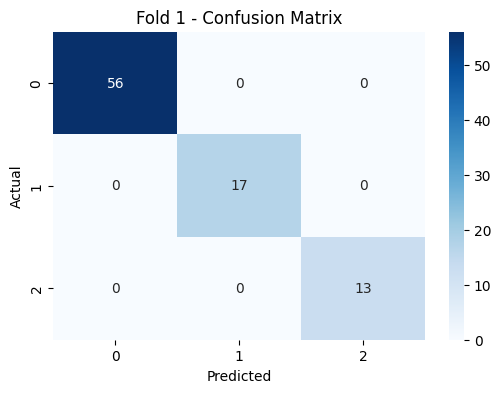


===== Fold 2 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.2393
Epoch 2 | Avg Loss: 0.0021
Epoch 3 | Avg Loss: 0.0013
Epoch 4 | Avg Loss: 0.0010
Epoch 5 | Avg Loss: 0.0008
Epoch 6 | Avg Loss: 0.0006
Epoch 7 | Avg Loss: 0.0006
Epoch 8 | Avg Loss: 0.0005
Epoch 9 | Avg Loss: 0.0005
Epoch 10 | Avg Loss: 0.0005
Fold 2 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        56
           1      1.000     1.000     1.000        17
           2      1.000     1.000     1.000        13

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[56  0  0]
 [ 0 17  0]
 [ 0  0 13]]


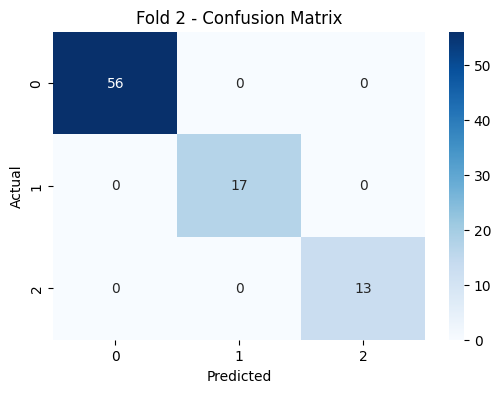


===== Fold 3 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.3779
Epoch 2 | Avg Loss: 0.0029
Epoch 3 | Avg Loss: 0.0014
Epoch 4 | Avg Loss: 0.0010
Epoch 5 | Avg Loss: 0.0008
Epoch 6 | Avg Loss: 0.0006
Epoch 7 | Avg Loss: 0.0006
Epoch 8 | Avg Loss: 0.0005
Epoch 9 | Avg Loss: 0.0005
Epoch 10 | Avg Loss: 0.0005
Fold 3 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        56
           1      1.000     1.000     1.000        17
           2      1.000     1.000     1.000        13

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[56  0  0]
 [ 0 17  0]
 [ 0  0 13]]


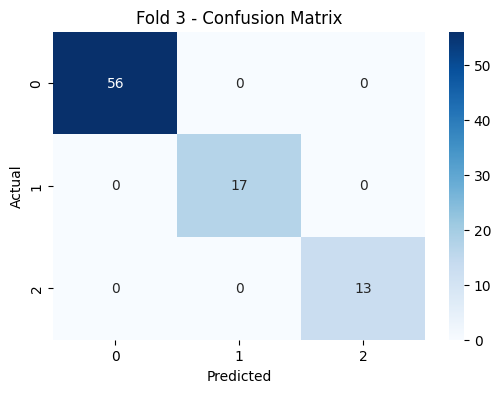


===== Fold 4 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.3447
Epoch 2 | Avg Loss: 0.0095
Epoch 3 | Avg Loss: 0.0018
Epoch 4 | Avg Loss: 0.0014
Epoch 5 | Avg Loss: 0.0010
Epoch 6 | Avg Loss: 0.0009
Epoch 7 | Avg Loss: 0.0008
Epoch 8 | Avg Loss: 0.0007
Epoch 9 | Avg Loss: 0.0007
Epoch 10 | Avg Loss: 0.0007
Fold 4 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        56
           1      1.000     1.000     1.000        16
           2      1.000     1.000     1.000        14

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[56  0  0]
 [ 0 16  0]
 [ 0  0 14]]


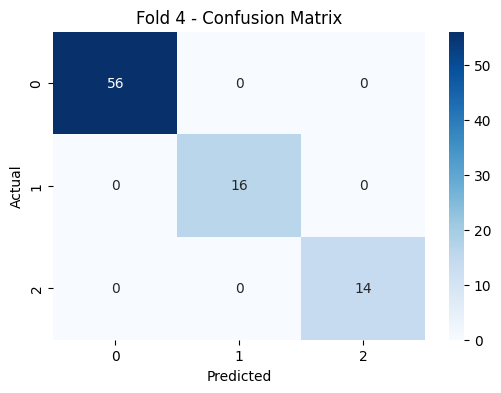


===== Fold 5 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.3655
Epoch 2 | Avg Loss: 0.0231
Epoch 3 | Avg Loss: 0.0016
Epoch 4 | Avg Loss: 0.0011
Epoch 5 | Avg Loss: 0.0009
Epoch 6 | Avg Loss: 0.0007
Epoch 7 | Avg Loss: 0.0006
Epoch 8 | Avg Loss: 0.0006
Epoch 9 | Avg Loss: 0.0006
Epoch 10 | Avg Loss: 0.0005
Fold 5 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        56
           1      1.000     1.000     1.000        16
           2      1.000     1.000     1.000        14

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[56  0  0]
 [ 0 16  0]
 [ 0  0 14]]


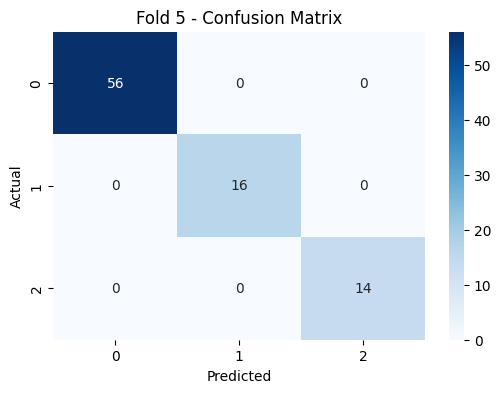


===== Fold 6 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.3343
Epoch 2 | Avg Loss: 0.0026
Epoch 3 | Avg Loss: 0.0011
Epoch 4 | Avg Loss: 0.0008
Epoch 5 | Avg Loss: 0.0006
Epoch 6 | Avg Loss: 0.0005
Epoch 7 | Avg Loss: 0.0005
Epoch 8 | Avg Loss: 0.0004
Epoch 9 | Avg Loss: 0.0004
Epoch 10 | Avg Loss: 0.0004
Fold 6 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        55
           1      1.000     1.000     1.000        17
           2      1.000     1.000     1.000        14

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[55  0  0]
 [ 0 17  0]
 [ 0  0 14]]


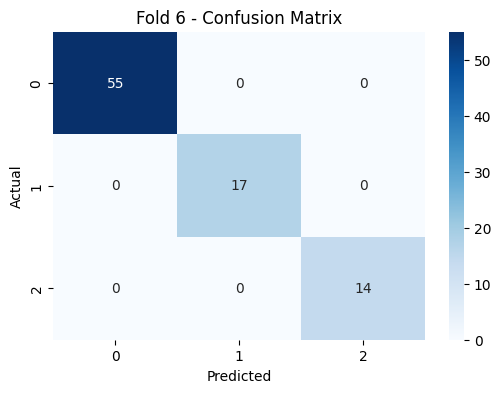


===== Fold 7 =====


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Avg Loss: 0.3041
Epoch 2 | Avg Loss: 0.0023
Epoch 3 | Avg Loss: 0.0014
Epoch 4 | Avg Loss: 0.0010
Epoch 5 | Avg Loss: 0.0008
Epoch 6 | Avg Loss: 0.0006
Epoch 7 | Avg Loss: 0.0006
Epoch 8 | Avg Loss: 0.0005
Epoch 9 | Avg Loss: 0.0005
Epoch 10 | Avg Loss: 0.0005
Fold 7 Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000, Kappa: 1.0000
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        55
           1      1.000     1.000     1.000        17
           2      1.000     1.000     1.000        14

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86

Confusion Matrix:
 [[55  0  0]
 [ 0 17  0]
 [ 0  0 14]]


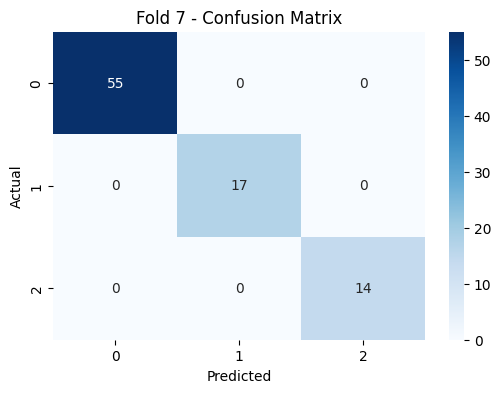


==== Final Average Metrics Across Folds ====
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
Kappa Score: 1.0000


In [ ]:
import matplotlib.pyplot as plt
# Begin K-Fold loop
for fold, (train_idx, test_idx) in enumerate(skf.split(texts, labels)):
    print(f"\n===== Fold {fold + 1} =====")
    fold_names.append(f"Fold {fold + 1}")

    # Create loaders
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    test_subset = torch.utils.data.Subset(dataset, test_idx)
    train_loader = DataLoader(train_subset, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=8, shuffle=False)

    # Model setup
    model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)
    num_epochs = 10
    total_steps = len(train_loader) * num_epochs
    scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)

    # Training loop
    epoch_train_losses = []
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)
        epoch_train_losses.append(avg_train_loss)
        print(f"Epoch {epoch+1} | Avg Loss: {avg_train_loss:.4f}")
    train_losses.append(epoch_train_losses[-1])  # Save final epoch's train loss

    # Evaluation
    model.eval()
    all_preds, all_true, all_probs = [], [], []
    test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            probs = torch.softmax(outputs.logits, dim=1)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(batch['labels'].cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    # Metrics
    acc = accuracy_score(all_true, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_true, all_preds, average='weighted')
    test_kappa = cohen_kappa_score(all_true, all_preds)

    test_kappas.append(test_kappa)
    conf_mat = confusion_matrix(all_true, all_preds)

    print(f"Fold {fold + 1} Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Kappa: {test_kappa:.4f}")
    print(classification_report(all_true, all_preds, digits=3))
    print("Confusion Matrix:\n", conf_mat)

    all_accuracies.append(acc)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)

     # Confidence analysis
    confidences = np.max(all_probs, axis=1)
    all_confidences.extend(confidences)
    wrong_confidences.extend(confidences[np.array(all_preds) != np.array(all_true)])

    # Plot confusion matrix for each fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Fold {fold + 1} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Final average
print("\n==== Final Average Metrics Across Folds ====")
print(f"Accuracy:  {np.mean(all_accuracies):.4f}")
print(f"Precision: {np.mean(all_precisions):.4f}")
print(f"Recall:    {np.mean(all_recalls):.4f}")
print(f"F1 Score:  {np.mean(all_f1s):.4f}")
print(f"Kappa Score: {np.mean(test_kappas):.4f}")

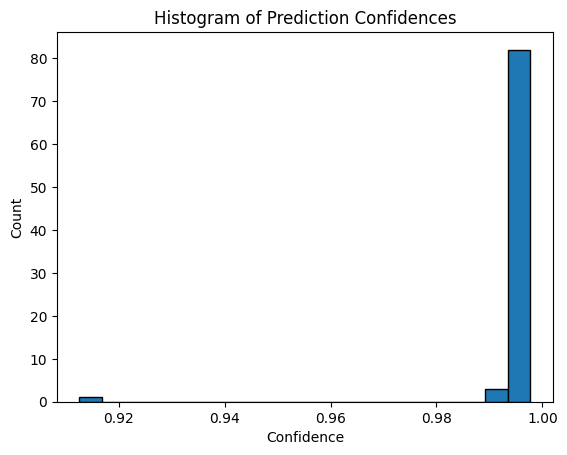

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

model.eval()
all_confidences = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        probs = F.softmax(outputs.logits, dim=1)
        max_conf = torch.max(probs, dim=1).values
        all_confidences.extend(max_conf.cpu().numpy())

plt.hist(all_confidences, bins=20, edgecolor='black')
plt.title("Histogram of Prediction Confidences")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.show()

In [ ]:
#  Histogram: Confidence on incorrect predictions
plt.figure(figsize=(6, 4))
plt.hist(wrong_confidences, bins=20, edgecolor='black')
plt.title("Confidence on Incorrect Predictions")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.show()

# Reliability diagram (calibration curve)
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(
    y_true=(np.array(all_preds) == np.array(all_true)),
    y_prob=all_confidences,
    n_bins=10
)
plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title("Reliability Diagram (Calibration Curve)")
plt.xlabel("Confidence")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'wrong_confidences' is not defined

<Figure size 600x400 with 0 Axes>

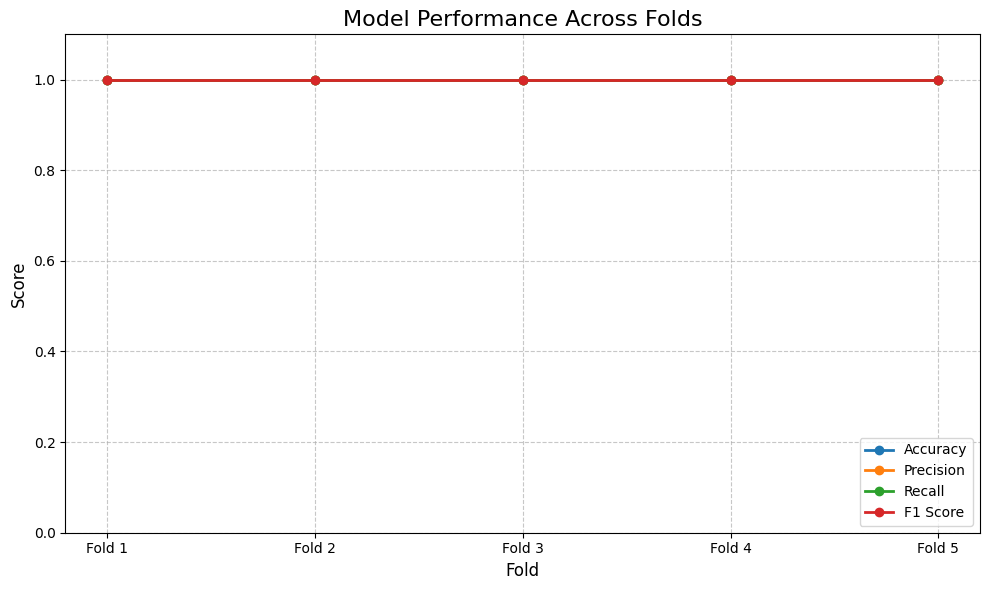

In [ ]:
import matplotlib.pyplot as plt
# Plotting results
df_results = pd.DataFrame({
    "Fold": fold_names,
    "Accuracy": all_accuracies,
    "Precision": all_precisions,
    "Recall": all_recalls,
    "F1 Score": all_f1s
})

plt.figure(figsize=(10, 6))
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plt.plot(df_results["Fold"], df_results[metric], marker='o', label=metric, linewidth=2)

plt.title("Model Performance Across Folds", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()
